Importing libraries

In [1]:
import pandas as pd
import numpy as np


Mounting the drive to access the csv file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/TSF/Iris.csv')

Seeing the data i.e,  the features and instances in it.

In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Drop the ID column because, it is not considered as valid feature.

In [5]:
data=data.drop('Id',axis=1)

The three classes of flowers are 
1. Iris-setosa
2. Iris-versicolor
3.Iris-virginica

There are 150 datapoints and 4 features :
1.SepalLengthCm
2.SepalWidthCm
3.PetalLengthCm
4.PetalWidthCm

Train-Test-Split on the data to acquire the accuracy of generalisation of the model.

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.3,random_state=52)

In [7]:
print(xtrain,"\n",ytrain)
print(xtest,"-\n",ytest) 

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
31             5.4           3.4            1.5           0.4
18             5.7           3.8            1.7           0.3
88             5.6           3.0            4.1           1.3
94             5.6           2.7            4.2           1.3
1              4.9           3.0            1.4           0.2
..             ...           ...            ...           ...
97             6.2           2.9            4.3           1.3
139            6.9           3.1            5.4           2.1
86             6.7           3.1            4.7           1.5
13             4.3           3.0            1.1           0.1
11             4.8           3.4            1.6           0.2

[105 rows x 4 columns] 
 31         Iris-setosa
18         Iris-setosa
88     Iris-versicolor
94     Iris-versicolor
1          Iris-setosa
            ...       
97     Iris-versicolor
139     Iris-virginica
86     Iris-versicolor
13         Iris-setosa


# ***Decision Tree***

In [8]:
from sklearn.tree import DecisionTreeClassifier

criterion='entropy'

In [9]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=52,splitter='best')
dt.fit(xtrain,ytrain)
ytrain1=dt.predict(xtrain)
ytest1=dt.predict(xtest)

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy_score")
print("Train:",accuracy_score(ytrain1,ytrain)*100)
print("Test:",accuracy_score(ytest1,ytest)*100)
print("confusion matrix")
print("Train:\n",confusion_matrix(ytrain1,ytrain))
print("Test:\n",confusion_matrix(ytest1,ytest))
print("Classification_report")
print("Train:\n",classification_report(ytrain1,ytrain))
print("Test:\n",classification_report(ytest1,ytest))

Accuracy_score
Train: 100.0
Test: 93.33333333333333
confusion matrix
Train:
 [[39  0  0]
 [ 0 33  0]
 [ 0  0 33]]
Test:
 [[11  0  0]
 [ 0 14  0]
 [ 0  3 17]]
Classification_report
Train:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       1.00      1.00      1.00        33
 Iris-virginica       1.00      1.00      1.00        33

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105

Test:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.82      1.00      0.90        14
 Iris-virginica       1.00      0.85      0.92        20

       accuracy                           0.93        45
      macro avg       0.94      0.95      0.94        45
   weighted avg       0.95      0.93      0.93        45



In [11]:
!pip install pydotplus
!apt-getinstall graphviz-y
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: apt-getinstall: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


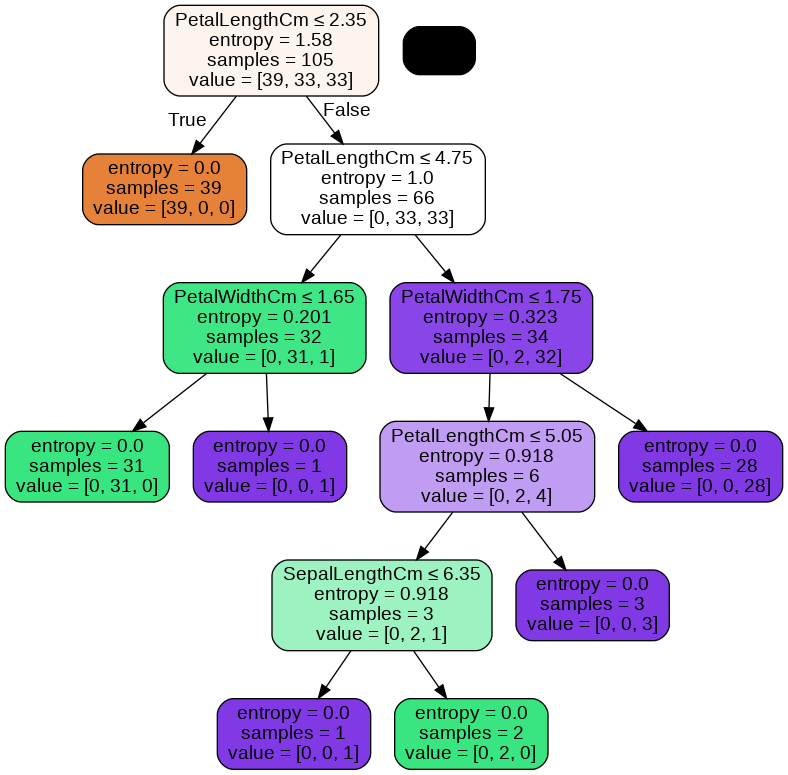

In [12]:

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

criterion='ginn'

In [13]:
dt=DecisionTreeClassifier(criterion='gini',random_state=52,splitter='best')
dt.fit(xtrain,ytrain)
ytrain1=dt.predict(xtrain)
ytest1=dt.predict(xtest)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy_score")
print("Train:",accuracy_score(ytrain1,ytrain)*100)
print("Test:",accuracy_score(ytest1,ytest)*100)
print("confusion matrix")
print("Train:\n",confusion_matrix(ytrain1,ytrain))
print("Test:\n",confusion_matrix(ytest1,ytest))
print("Classification_report")
print("Train:\n",classification_report(ytrain1,ytrain))
print("Test:\n",classification_report(ytest1,ytest))

Accuracy_score
Train: 100.0
Test: 93.33333333333333
confusion matrix
Train:
 [[39  0  0]
 [ 0 33  0]
 [ 0  0 33]]
Test:
 [[11  0  0]
 [ 0 14  0]
 [ 0  3 17]]
Classification_report
Train:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       1.00      1.00      1.00        33
 Iris-virginica       1.00      1.00      1.00        33

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105

Test:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.82      1.00      0.90        14
 Iris-virginica       1.00      0.85      0.92        20

       accuracy                           0.93        45
      macro avg       0.94      0.95      0.94        45
   weighted avg       0.95      0.93      0.93        45



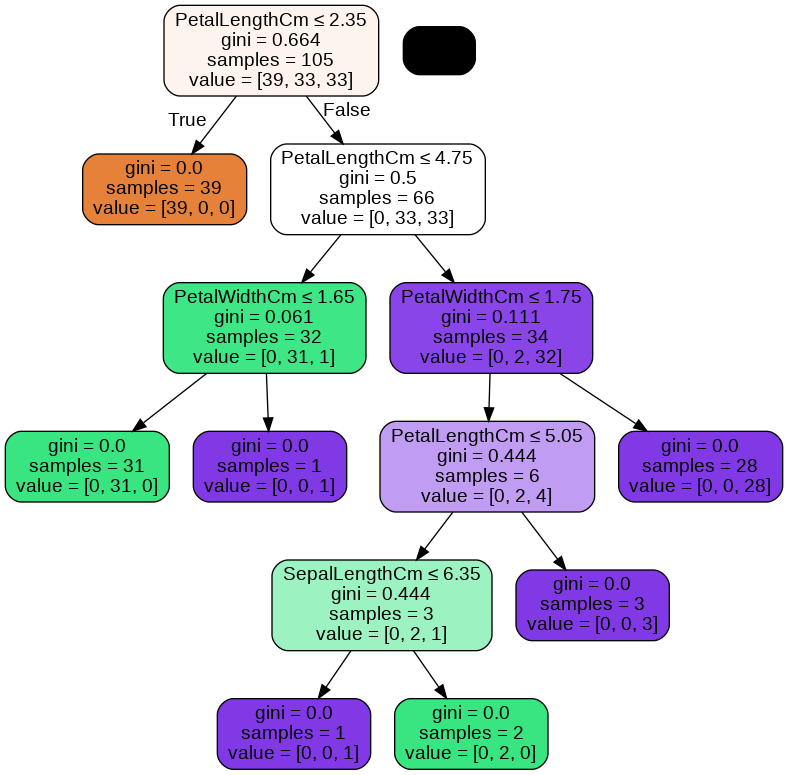

In [15]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())